In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [3]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)

In [4]:
len(results)

2115

In [5]:
results['Abyssal_whip'].keys()

dict_keys(['sma', 'buyAndHold', 'startMAE', 'predictions', 'persist', 'endMAE', 'sma_model', 'stochOscil', 'numPrices', 'budget', 'momentum_model', 'testPrices', 'momentum', 'endLoss', 'numEpochs', 'startLoss', 'model_opt', 'perfect', 'opt_params', 'item', 'model', 'stochOscil_model'])

In [38]:
modelProfs = [(item,results[item]['model']) for item in results ]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)
modelProfs_opt = [(item,results[item]['model_opt']) for item in results ]
modelProfs_opt = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [39]:
pprint(modelProfs[0:10])

[('Ring_mould', 19.332506203473944),
 ('Mind_talisman', 16.67655379339906),
 ('Shears', 10.717901687454145),
 ('Necklace_mould', 5.763350559862188),
 ('Amulet_mould', 5.273201251303441),
 ('Cleaning_cloth', 4.807556704665648),
 ('Royal_crown', 4.7404254504408865),
 ('Shantay_pass', 4.64188351920694),
 ('Vampyre_dust', 4.537762174813214),
 ('Bronze_kiteshield', 3.7417218543046356)]


In [40]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results ]
mod_optVSpers = [(item,results[item]['model_opt']-results[item]['persist']) for item in results ]
mod_optVSbah = [(item,results[item]['model_opt']-results[item]['buyAndHold']) for item in results ]

In [41]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)
mod_optVSpers = sorted(mod_optVSpers, key=lambda x: x[1], reverse=True)
mod_optVSbah = sorted(mod_optVSbah, key=lambda x: x[1], reverse=True)

In [42]:
pprint(modVSpers[0:10])
pprint(mod_optVSpers[0:10])

[('Shantay_pass', 3.5576208178438664),
 ('Leather_chaps', 1.9),
 ('Feather', 1.205298013245033),
 ("Bob's_green_shirt", 1.0706595357428361),
 ('Basket', 1.056384742951907),
 ('Royal_sceptre', 1.0197804949123275),
 ('Cadavaberry_seed', 0.9800995024875623),
 ('Fishing_potion(1)', 0.8846000384223204),
 ('Big_pirate_hat', 0.8671576605729808),
 ("Bob's_purple_shirt", 0.8469344141446695)]
[('Leather_cowl', 5.664179104477611),
 ('Redberry_seed', 4.5),
 ('Yanillian_seed', 3.089387934830471),
 ('Jute_seed', 2.2141768292682924),
 ('Leather_chaps', 1.9),
 ('Basket', 1.2703150912106136),
 ('Feather', 1.2019867549668874),
 ('Marigold_seed', 1.1699999999999997),
 ('Jug_of_wine', 1.153973509933775),
 ('Rosemary_seed', 1.0248756218905473)]


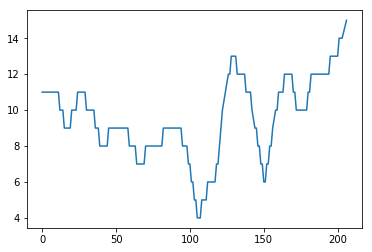

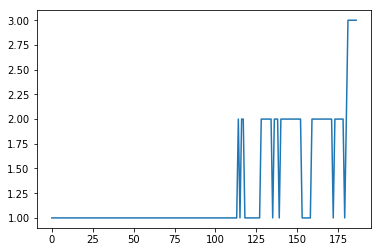

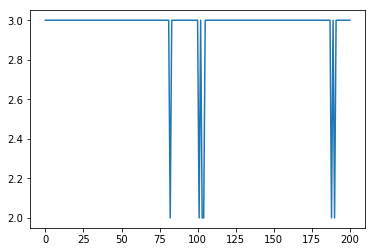

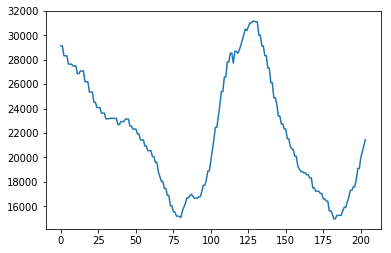

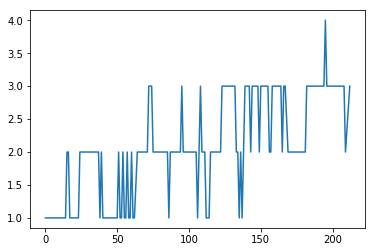

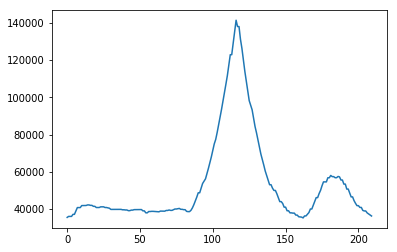

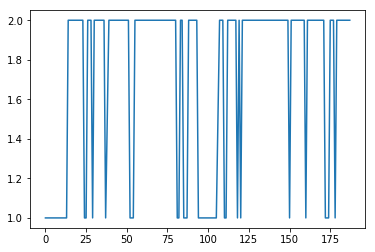

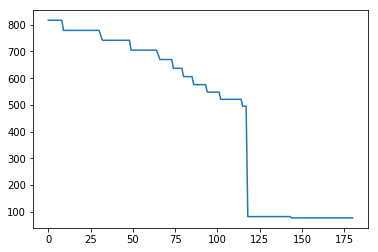

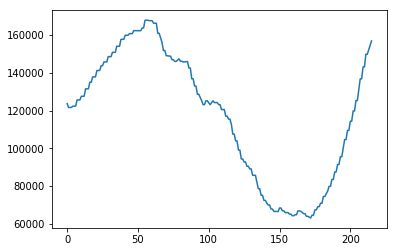

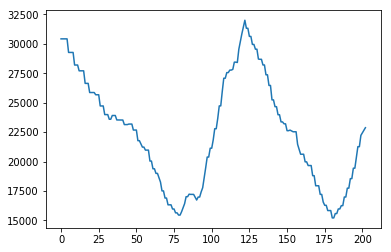

In [43]:
for a in modVSpers[0:10]:
    prices = items.getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

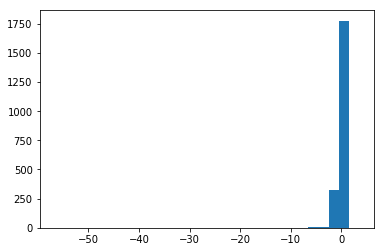

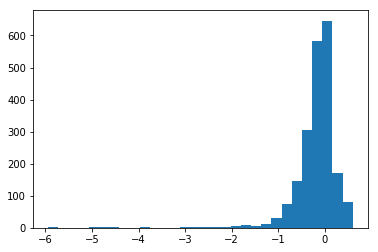

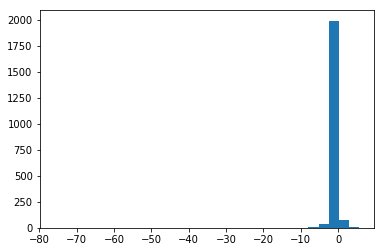

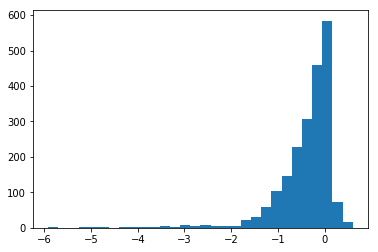

In [44]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()

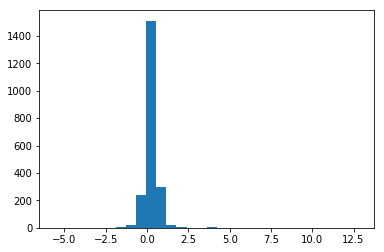

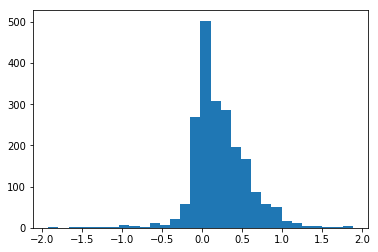

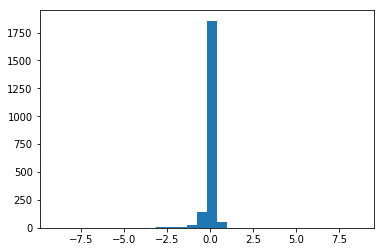

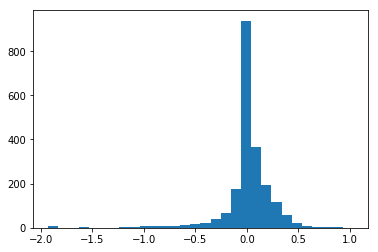

In [45]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in mod_optVSbah],30)
plt.show()
plt.hist([a[1] for a in mod_optVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [46]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])
numProfModels_opt = len([a for a in modelProfs_opt if a[1]>0])
numProfmod_optVSpers = len([a for a in mod_optVSpers if a[1]>0])
numProfmod_optVSbah = len([a for a in mod_optVSbah if a[1]>0])

In [47]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))
print(numProfModels_opt/len(results))
print(numProfmod_optVSpers/len(results))
print(numProfmod_optVSbah/len(results))

2115
0.6056737588652482
0.2765957446808511
0.7130023640661939
0.6056737588652482
0.16501182033096926
0.5943262411347517


In [64]:
actualModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

actualPersProfs = [(item,items.getPrices(item)[-1]*results[item]['persist']) for item in results if items.getPrices(item)[-1]<10000000]
actualPersProfs = sorted(actualPersProfs, key=lambda x: x[1], reverse=True)

actualPersVsModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000 and (results[item]['model']-results[item]['persist'])>0]
actualPersVsModProfs = sorted(actualPersVsModProfs, key=lambda x: x[1], reverse=True)

In [65]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)
actualPersProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['persist'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualPersProfsPerDay = sorted(actualPersProfsPerDay, key=lambda x: x[1], reverse=True)

In [66]:
pprint(actualModProfs[0:10])
pprint(actualPersProfs[0:10])
pprint(actualPersVsModProfs[0:10])

[('Serpentine_helm_(uncharged)', 2515649.242637036),
 ("Rangers'_tunic", 2436429.8746378575),
 ('Royal_crown', 2164108.5074861743),
 ("Pharaoh's_sceptre_(3)", 2081489.2592292032),
 ("Pharaoh's_sceptre", 2050716.4349413025),
 ('Magic_fang', 1985070.1970599336),
 ('Uncharged_toxic_trident', 1983897.985325594),
 ("Ahrim's_armour_set", 1873050.4311230397),
 ('Staff_of_the_dead', 1808423.626614082),
 ('Gilded_boots', 1626321.6194165086)]
[('Serpentine_visage', 5817749.813161366),
 ('Serpentine_helm_(uncharged)', 5134778.866578279),
 ('Magic_fang', 4767291.653409718),
 ('Uncharged_toxic_trident', 4716469.549179112),
 ("Pharaoh's_sceptre_(3)", 4330693.076001602),
 ('Staff_of_the_dead', 3794598.6434102836),
 ('Toxic_staff_(uncharged)', 3667853.8810922964),
 ("Rangers'_tunic", 3392742.575265963),
 ("Pharaoh's_sceptre", 3104193.505455687),
 ('Smouldering_stone', 2620735.154413975)]
[("Ahrim's_armour_set", 1873050.4311230397),
 ('Gilded_boots', 1626321.6194165086),
 ("Saradomin's_tear", 1205382.9

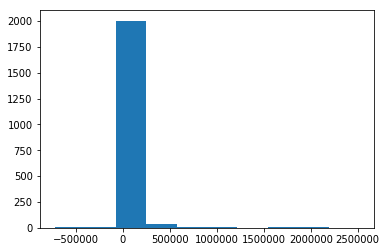

In [67]:
plt.hist([a[1] for a in actualModProfs])
plt.show()

In [68]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

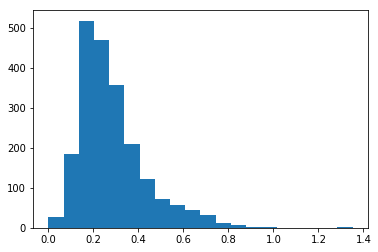

In [69]:
plt.hist(mae,20)
plt.show()

In [70]:
maeArr = [(item,results[item]['endMAE']) for item in results]
maeArr = sorted(maeArr, key=lambda x: x[1], reverse=False)

In [71]:
print(maeArr[:100])

[('Marrentill_tar', 0.0), ("Premade_w'm_crun'", 3.725290298461914e-09), ("Premade_t'd_batta", 4.6566128730773926e-09), ("Premade_wiz_blz'd", 5.587935447692871e-09), ('Oak_magic_wardrobe', 1.1641532182693481e-08), ('Moonlight_mead(m4)', 1.862645149230957e-08), ("Premade_w'm_batta", 3.026798367500305e-08), ('Ugthanki_&_tomato', 3.818422555923462e-08), ("Premade_fr't_batta", 4.190951585769653e-08), ('Chopped_ugthanki', 4.470348358154297e-08), ("Premade_s'y_crunch", 5.029141902923584e-08), ("Relicym's_mix(1)", 5.21540641784668e-08), ('Zamorak_mix(1)', 5.960464477539063e-08), ('Rock-climbing_boots', 5.960464477539063e-08), ('Premade_veg_batta', 7.171183824539185e-08), ('Moonlight_mead(4)', 7.82310962677002e-08), ('Oak_treasure_chest', 8.195638656616211e-08), ('Tarromin_tar', 9.872019290924072e-08), ('Iron_javelin(p+)', 1.1920928955078125e-07), ('Premade_ttl', 0.018301721662282944), ('Ham_shirt', 0.041166420890526335), ('Maple_longbow_(u)', 0.04703089925037189), ('Curry_tree_seed', 0.0535839

In [73]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.015954070623778273
bl,price -0.05144175220748757
prof,pers 0.8301196606719506
profs,perf -0.031645741746128865
profs,bah 0.6097817399996706
profs,mae -0.19691078808605428
profdiff,mae 0.06058094731635594
prices,mae -0.0030459703689468304
profs,mae -0.19691078808605428
profdiff,mae 0.06058094731635594


In [74]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']>0]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']>0]
profs = [results[item]['model'] for item in results if results[item]['model']>0]
pers = [results[item]['persist'] for item in results if results[item]['model']>0]
perf = [results[item]['perfect'] for item in results if results[item]['model']>0]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']>0]
mae = [results[item]['endMAE'] for item in results if results[item]['model']>0]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']>0]

In [75]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.0227395432560493
bl,price -0.045829785364704466
prof,pers 0.8477822883307856
profs,perf 0.11397495670839308
profs,bah 0.6115774608185168
profs,mae -0.20275934002141122
profdiff,mae 0.11253259618137156
prices,mae 0.02875615888539656
profs,mae -0.20275934002141122
profdiff,mae 0.11253259618137156


In [76]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']<0]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']<0]
profs = [results[item]['model'] for item in results if results[item]['model']<0]
pers = [results[item]['persist'] for item in results if results[item]['model']<0]
perf = [results[item]['perfect'] for item in results if results[item]['model']<0]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']<0]
mae = [results[item]['endMAE'] for item in results if results[item]['model']<0]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']<0]

In [77]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs 0.009961335092731598
bl,price -0.08602776799072506
prof,pers -0.06530099731014827
profs,perf -0.35293598558732386
profdiff,mae 0.04770062652416481
prices,mae -0.06269104666947019
profs,mae -0.03607526166224607
profdiff,mae 0.04770062652416481
